In [1]:
import numpy as np
import pandas as pd

In [2]:
DATA_FILE= 'uber-raw-data-sep14.csv'
uber_data = pd.read_csv(DATA_FILE)
uber_data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [3]:
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber_data['DayOfWeekNum'] = uber_data['Date/Time'].dt.dayofweek
uber_data['DayOfWeek'] = uber_data['Date/Time'].dt.strftime("%A")
uber_data['MonthDayNum'] = uber_data['Date/Time'].dt.day
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour
uber_data['MinOfDay'] = uber_data['Date/Time'].dt.minute
uber_data.head()

,Date/Time,Lat,Lon,Base,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay,MinOfDay
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,0,Monday,1,0,1
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,0,Monday,1,0,1
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,0,Monday,1,0,3
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,0,Monday,1,0,6
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,0,Monday,1,0,11


In [4]:
weekday = uber_data.pivot_table(index=['DayOfWeek'], values='Base', aggfunc='count')
weekday.head()

,Base
DayOfWeek,
Friday,160380
Monday,137288
Saturday,162057
Sunday,116532
Thursday,153276


In [5]:
weekdayAverage= weekday/30
weekdayAverage.head()

,Base
DayOfWeek,
Friday,5346.000000
Monday,4576.266667
Saturday,5401.900000
Sunday,3884.400000
Thursday,5109.200000


Text(0.5, 1.0, 'Average Rides per Day vs Day of Week')

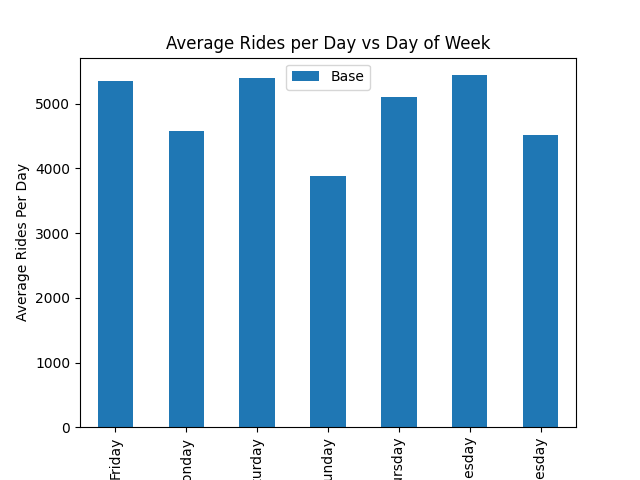

In [9]:
%matplotlib ipympl
import matplotlib.pyplot as plt
weekdayAverage.plot(kind='bar')
plt.ylabel('Average Rides Per Day')
plt.title('Average Rides per Day vs Day of Week')

Text(0.5, 1.0, 'Number of Rides vs Hour of Day')

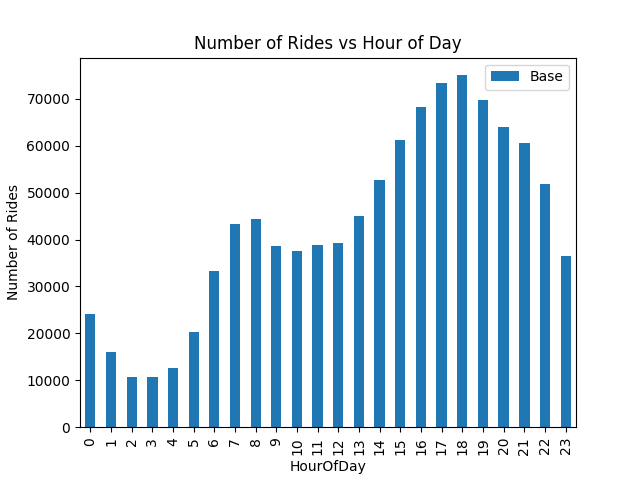

In [10]:
Hours = uber_data.pivot_table(index=['HourOfDay'], values='Base', aggfunc='count')
Hours/30
Hours.plot(kind='bar')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Hour of Day')

<AxesSubplot:xlabel='HourOfDay'>

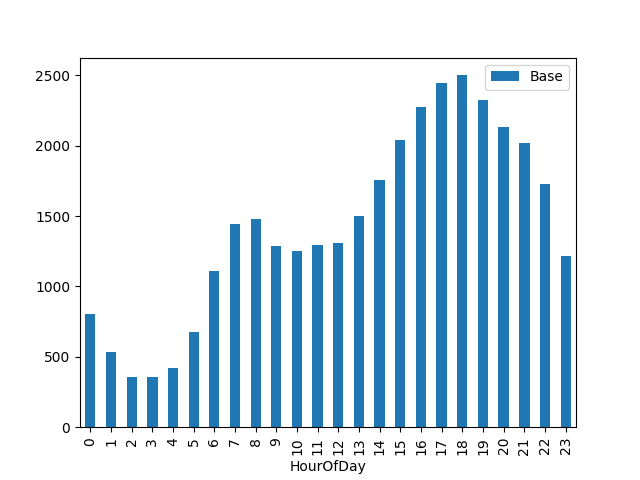

In [11]:
avgHours=Hours/30
avgHours.plot(kind='bar')

(16500.0, 18000.0)

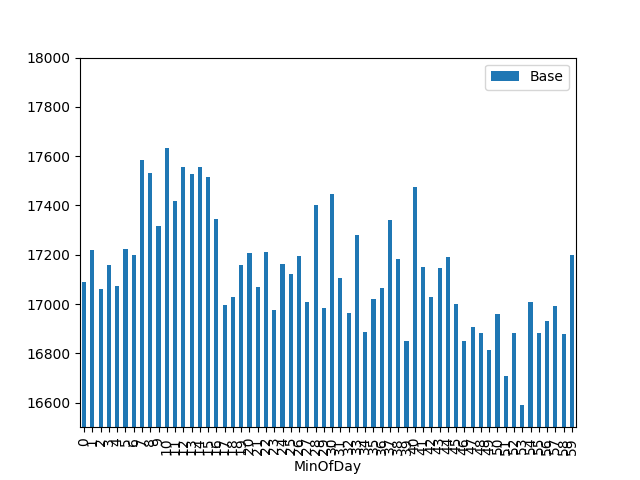

In [12]:
min = uber_data.pivot_table(index=['MinOfDay'], values='Base', aggfunc='count')
min.plot(kind='bar')
plt.ylim(16500,18000)

In [13]:
min.max()


Base    17633
dtype: int64

In [14]:
min.min()

Base    16590
dtype: int64

In [15]:
print(Hours)

            Base
HourOfDay       
0          24133
1          16107
2          10702
3          10789
4          12675
5          20262
6          33307
7          43314
8          44477
9          38542
10         37634
11         38821
12         39193
13         45042
14         52643
15         61219
16         68224
17         73373
18         75040
19         69660
20         63988
21         60606
22         51817
23         36568
